In [1]:
import torch
import torch.nn as nn  # Neural network module
import matplotlib.pyplot as plt  # For plotting

In [4]:
import torch

torch.manual_seed(71)

X = torch.randn(100, 1)
y = 3.0 * X + 2.0 + torch.randn(100, 1) * 0.5






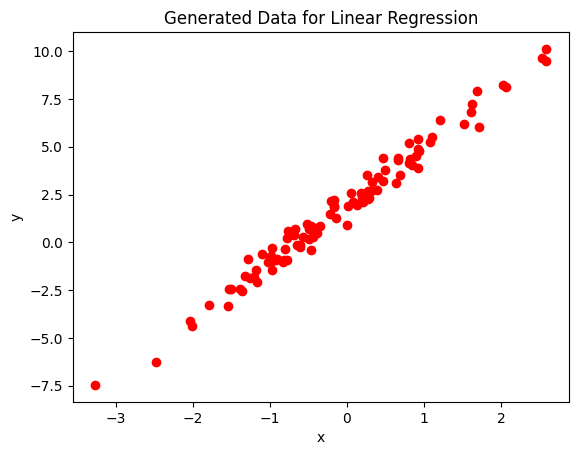

In [5]:
# Plot the original data
plt.scatter(X, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [6]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)


In [7]:
# Initialize the Model
torch.manual_seed(59)  # Ensure same initial weights
model = Model(1, 1)

In [8]:
# Print Initial Weights and Bias
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print("\nName: ")
print("Register No: ")
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')


Name: 
Register No: 
Initial Weight: 0.10597813, Initial Bias: 0.96379614



In [9]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
epochs = 100
losses = []

for epoch in range(1, epochs + 1):

    # Forward pass
    y_pred = model(X)
    loss = loss_function(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    print(f"epoch: {epoch:2} "
          f"loss: {loss.item():10.8f} "
          f"weight: {model.linear.weight.item():10.8f} "
          f"bias: {model.linear.bias.item():10.8f}")

epoch:  1 loss: 10.89076424 weight: 0.78868061 bias: 1.10810995
epoch:  2 loss: 6.58539248 weight: 1.30940056 bias: 1.23746765
epoch:  3 loss: 4.03708887 weight: 1.70696402 bias: 1.35156083
epoch:  4 loss: 2.52103782 weight: 2.01081109 bias: 1.45093369
epoch:  5 loss: 1.61429596 weight: 2.24328136 bias: 1.53662133
epoch:  6 loss: 1.06900859 weight: 2.42133856 bias: 1.60990691
epoch:  7 loss: 0.73926437 weight: 2.55787492 bias: 1.67216241
epoch:  8 loss: 0.53874671 weight: 2.66269588 bias: 1.72474802
epoch:  9 loss: 0.41613349 weight: 2.74326634 bias: 1.76895165
epoch: 10 loss: 0.34074739 weight: 2.80527353 bias: 1.80595577
epoch: 11 loss: 0.29415148 weight: 2.85305524 bias: 1.83682215
epoch: 12 loss: 0.26520312 weight: 2.88992286 bias: 1.86248863
epoch: 13 loss: 0.24713095 weight: 2.91840720 bias: 1.88377273
epoch: 14 loss: 0.23579678 weight: 2.94044399 bias: 1.90138030
epoch: 15 loss: 0.22865786 weight: 2.95751595 bias: 1.91591525
epoch: 16 loss: 0.22414345 weight: 2.97075987 bias: 1.

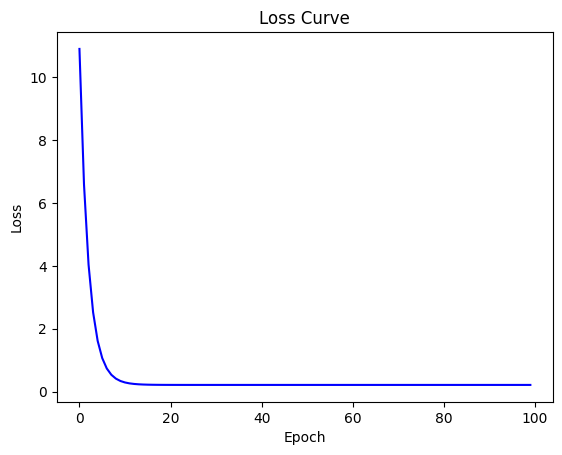

In [11]:
# Plot Loss Curve
plt.plot(range(epochs), losses, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

In [12]:
# Final Weights & Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print("\nName: ")
print("Register No: ")
print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')


Name: 
Register No: 

Final Weight: 3.01790738, Final Bias: 1.98194432


In [14]:
#  Best-Fit Line Calculation
x1 = torch.tensor([X.min().item(), X.max().item()]) # Find min and max values of X
y1 = x1 * final_weight + final_bias # Compute corresponding y-values using trained model

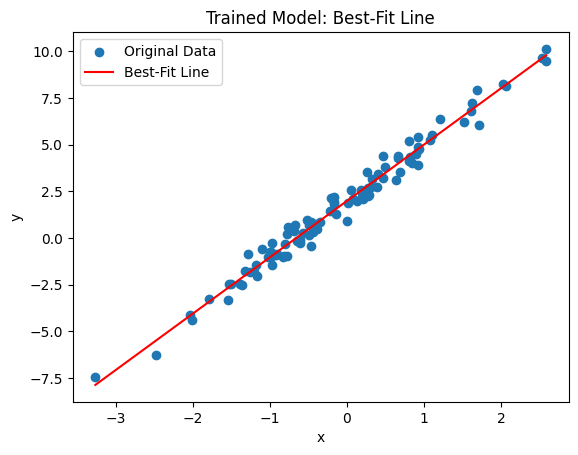

In [15]:
# Plot Original Data & Best-Fit Line
plt.scatter(X, y, label="Original Data")
plt.plot(x1, y1, 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [16]:
# Prediction for x = 120
x_new = torch.tensor([[120.0]])  # New input as a tensor
y_new_pred = model(x_new).item()  # Predict using trained model
print("\nName: ")
print("Register No: ")
print(f"\nPrediction for x = 120: {y_new_pred:.8f}")


Name: 
Register No: 

Prediction for x = 120: 364.13082886
